#### Paso 3: Variables de entorno

In [56]:
from dotenv import load_dotenv

load_dotenv()

import os

client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

#### Paso 4: Inicializar la biblioteca Spotipy

In [57]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

#### Paso 5: Realizar solicitudes a la API

In [58]:

BSB_uri = "spotify:artist:5rSXSAkZ67PYJSvpUpkOr7"
results = sp.artist_top_tracks(BSB_uri)

# Get the first 10 songs
if 'tracks' in results:
    for track in results['tracks'][:10]:
        print(f"Name: {track['name']}")
        print(f"Artist: {track['artists'][0]['name']}")
        print(f"URL: {track['external_urls']['spotify']}")
        print()


Name: I Want It That Way
Artist: Backstreet Boys
URL: https://open.spotify.com/track/47BBI51FKFwOMlIiX6m8ya

Name: Everybody (Backstreet's Back) - Radio Edit
Artist: Backstreet Boys
URL: https://open.spotify.com/track/7Jg65cOkLoiT7Q4vQqUvIG

Name: As Long as You Love Me
Artist: Backstreet Boys
URL: https://open.spotify.com/track/00WvmRXTkPBZNhhRK3xfdy

Name: Shape of My Heart
Artist: Backstreet Boys
URL: https://open.spotify.com/track/35o9a4iAfLl5jRmqMX9c1D

Name: Quit Playing Games (With My Heart)
Artist: Backstreet Boys
URL: https://open.spotify.com/track/1nRwyxNsqCLeA17qR8Nfxx

Name: Show Me the Meaning of Being Lonely
Artist: Backstreet Boys
URL: https://open.spotify.com/track/3BsaRV5QIulYz2lV9WWa8T

Name: Larger Than Life
Artist: Backstreet Boys
URL: https://open.spotify.com/track/6sbXGUn9V9ZaLwLdOfpKRE

Name: Everybody (Backstreet's Back) - Extended Version
Artist: Backstreet Boys
URL: https://open.spotify.com/track/5WTxbyWTpoqhdxEN2szOnl

Name: Drowning
Artist: Backstreet Boys
U

In [59]:
song_data = {
    'Name': [],
    'Popularity': [],
    'Duration (min)': []
}

if 'tracks' in results:
    for track in results['tracks'][:10]:  # Get the first 10 songs
        name = track['name']
        popularity = track['popularity']
        duration_ms = track['duration_ms']
        
        # Converts duration from milliseconds to minutes and seconds
        duration_minutes = duration_ms / 60000
        duration_seconds = (duration_ms % 60000) / 1000

        song_data['Name'].append(name)
        song_data['Popularity'].append(popularity)
        song_data['Duration (min)'].append(duration_minutes)
    
        print(f"Name: {name}")
        print(f"Popularity: {popularity}")
        print(f"Duration: {int(duration_minutes)} minutes y {int(duration_seconds)} seconds")
        print()

Name: I Want It That Way
Popularity: 85
Duration: 3 minutes y 33 seconds

Name: Everybody (Backstreet's Back) - Radio Edit
Popularity: 62
Duration: 3 minutes y 43 seconds

Name: As Long as You Love Me
Popularity: 65
Duration: 3 minutes y 34 seconds

Name: Shape of My Heart
Popularity: 75
Duration: 3 minutes y 50 seconds

Name: Quit Playing Games (With My Heart)
Popularity: 61
Duration: 3 minutes y 53 seconds

Name: Show Me the Meaning of Being Lonely
Popularity: 72
Duration: 3 minutes y 54 seconds

Name: Larger Than Life
Popularity: 72
Duration: 3 minutes y 52 seconds

Name: Everybody (Backstreet's Back) - Extended Version
Popularity: 62
Duration: 4 minutes y 47 seconds

Name: Drowning
Popularity: 68
Duration: 4 minutes y 27 seconds

Name: Incomplete
Popularity: 68
Duration: 3 minutes y 59 seconds



#### Paso 6: Transformar a Pandas DataFrame

In [60]:
import pandas as pd

df = pd.DataFrame(song_data)

df = df.sort_values(by='Popularity', ascending=False)
df.head(3)

,Name,Popularity,Duration (min)
0,I Want It That Way,85,3.555100
3,Shape of My Heart,75,3.834883
5,Show Me the Meaning of Being Lonely,72,3.916000


#### Paso 7: Analizar relación estadística

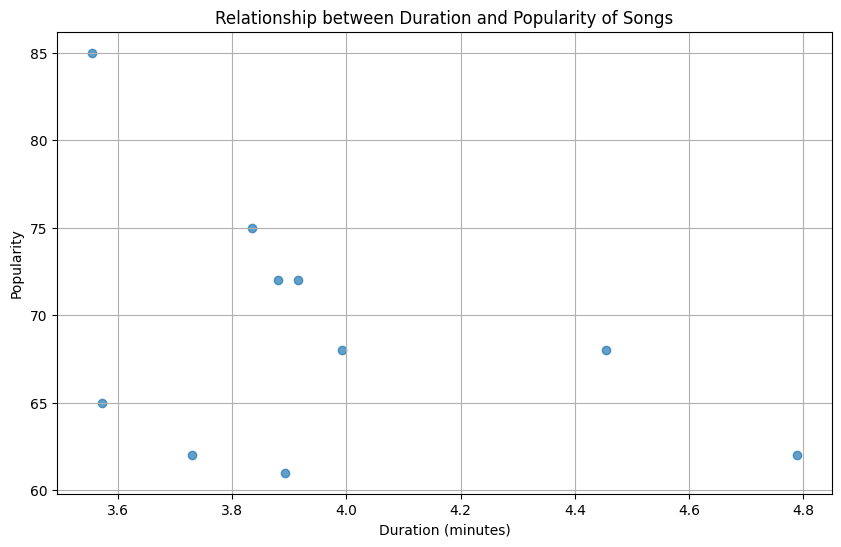

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['Duration (min)'], df['Popularity'], alpha=0.7)
plt.title('Relationship between Duration and Popularity of Songs')
plt.xlabel('Duration (minutes)')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()
